In [1]:
from google.colab import drive
drive.mount('/content/drive')
import warnings
warnings.filterwarnings("ignore")
!pip install gymnasium
!pip install stable-baselines3
!pip install sbx-rl
!pip install -U "jax[cuda11_pip]" -f https://storage.googleapis.com/jax-releases/jax_cuda_releases.html
import os
os.chdir("/content/drive/MyDrive/projects/portfolio-rl")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Looking in links: https://storage.googleapis.com/jax-releases/jax_cuda_releases.html


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import gymnasium as gym
from sbx import PPO
from stable_baselines3.common.env_util import make_vec_env
from portfolio_env import Sood

/usr/local/lib/python3.10/dist-packages/tensorflow_probability/python/__init__.py:57: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if (distutils.version.LooseVersion(tf.__version__) <


In [3]:
# Parallel environments
vec_env = make_vec_env(Sood, n_envs=4)

model = PPO("MlpPolicy", vec_env, verbose=1, seed=1)
model.learn(total_timesteps=100_000)
model.save("basic_portfolio_rl_model")

Using cuda device
-----------------------------
| time/              |      |
|    fps             | 1451 |
|    iterations      | 1    |
|    time_elapsed    | 5    |
|    total_timesteps | 8192 |
-----------------------------
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 2.42e+03 |
|    ep_rew_mean        | 42.1     |
| time/                 |          |
|    fps                | 978      |
|    iterations         | 2        |
|    time_elapsed       | 16       |
|    total_timesteps    | 16384    |
| train/                |          |
|    clip_range         | 0.2      |
|    explained_variance | 0.0207   |
|    n_updates          | 10       |
|    pg_loss            | -0.117   |
|    value_loss         | 1.05     |
------------------------------------
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 2.42e+03 |
|    ep_rew_mean        | 41.3     |
| time/                 |       

In [4]:
env = Sood(start_year=2020, end_year=2024)
obs, _ = env.reset()

port_val = [1.0]
snp_val = [1.0]
actions = []

for i in range(900):
    action, _ = model.predict(obs, deterministic=True)
    actions.append(action)
    obs, rewards, terminated, truncated, info = env.step(action)
    port_val.append(info['port_val'])
    snp_val.append(snp_val[-1] * (1 + env.idx_df[env.idx_df.index == env.times[env.t]].vwretd.values[0]))
    if terminated:
        break

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


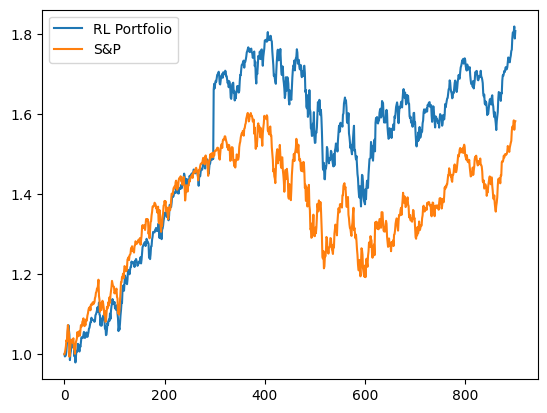

In [ ]:
plt.plot(np.array(port_val), label='RL Portfolio')
plt.plot(np.array(snp_val), label='S&P')
# plt.yscale('log')
plt.legend()
plt.show()

In [ ]:
np.argmax(np.max(env.ret, axis=0))

35

In [ ]:
env.tickers[35]

'WFC'

In [ ]:
np.stack(actions)[:, 35].argmax()

29